In [1]:
import pandas as pd
import yfinance as yf

,r_stock,r_bond,r_comm
count,34.000000,34.000000,34.000000
mean,0.096879,0.064979,0.049582
std,0.165500,0.050373,0.241523
min,-0.400907,-0.029200,-0.447385
25%,-0.010191,0.035625,-0.074535
50%,0.112708,0.062550,0.007398
75%,0.195710,0.089000,0.144571
max,0.352026,0.184700,0.526531


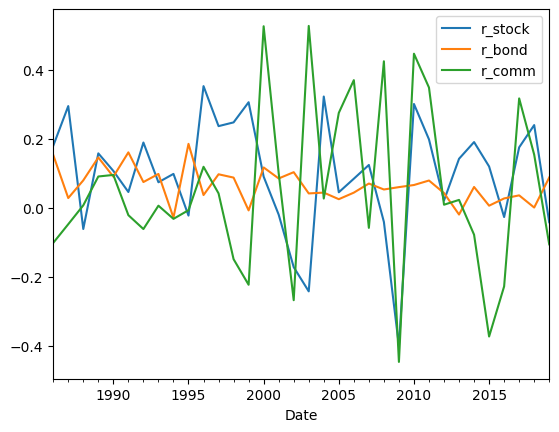

In [10]:
df_stock = yf.Ticker('^GSPC').history(start='1985-01-1', interval='1mo')
df_stock = df_stock.iloc[::12, :]
df_stock['Return'] = df_stock.Close.pct_change()
df_stock.index = df_stock.index.tz_localize(None)

df_bond = pd.read_csv('../data/bonds.csv', index_col='Year')
df_bond.index = pd.to_datetime(df_bond.index.astype(str)+'-01-01')
df_bond['Return'] = df_bond['Return'].str.rstrip('%').astype(float)/100
close = [100]
for i in range(1, df_bond.shape[0]):
    close.append(close[i-1]*(1+df_bond.iloc[i-1].Return))
df_bond['Close'] = close
df_bond.index.name = 'Date'

df_comm = yf.Ticker('^SPGSCI').history(start='1985-01-01', interval='1mo')
df_comm = df_comm.iloc[::12, :]
df_comm.index = df_comm.index.tz_localize(None)
df_comm['Return'] = df_comm.Close.pct_change()

df_pf = pd.DataFrame({'r_stock': df_stock.Return, 'r_bond': df_bond.Return, 'r_comm': df_comm.Return}, index=df_stock.index).dropna()
df_pf.plot()
df_pf.describe()

In [15]:
w = [1/3, 1/3, 1/3]
m_cov = df_pf.cov()
print(m_cov)
x = []
for i in range(3):
    for j in range(i+1, 3):
        x.append(2*w[i]*w[j]*m_cov.iloc[i, j])

          r_stock    r_bond    r_comm
r_stock  0.027390 -0.001399  0.005379
r_bond  -0.001399  0.002537  0.000275
r_comm   0.005379  0.000275  0.058333
-0.0013989003695924166
0.005379138519691587
0.00027548153415599537
